In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# 0. Valid Convolution

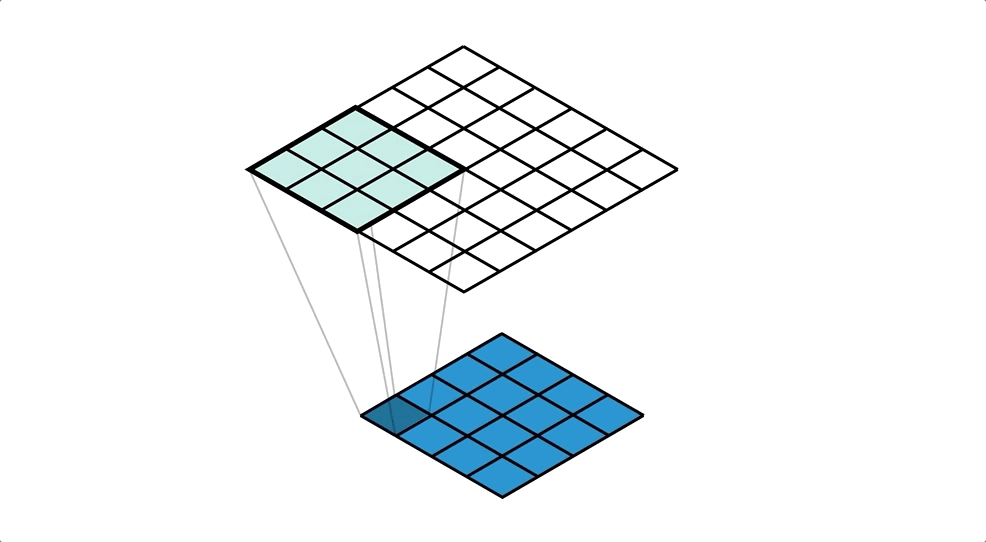

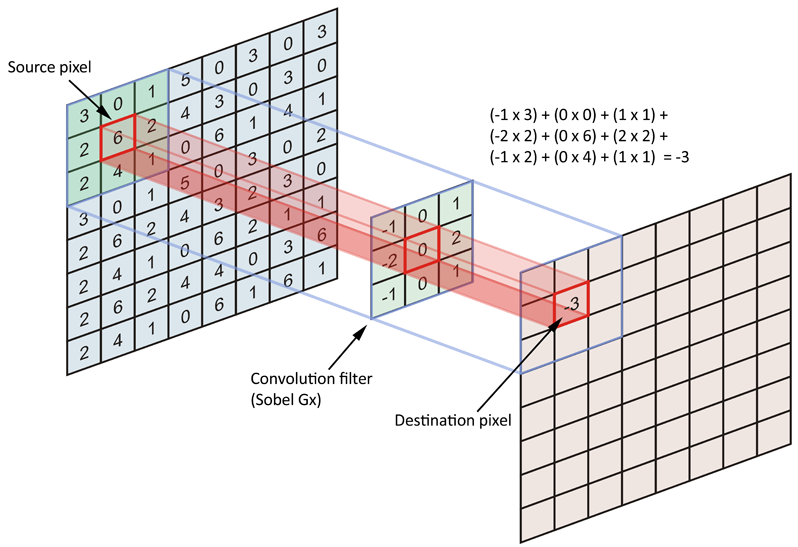

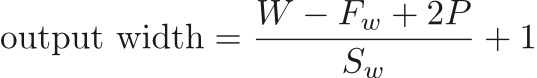

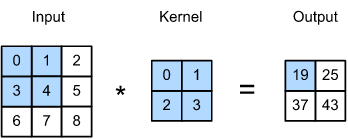

In [ ]:
def convolve_grayscale_valid(images, kernel):
    m, h, w = images.shape
    kh, kw = kernel.shape

    oh = h - kh +1
    ow = w - kw +1

    output_dim=(m, oh, ow)

    outputs = np.zeros(output_dim)

    for i in range(oh):
        for j in range(ow): 
            M = images[:, i:i + kh, j: j + kw]
            outputs[:, i, j] = np.sum(np.multiply(M,kernel), axis=(1,2))

    return outputs


Test 

(50000, 28, 28)
(50000, 26, 26)


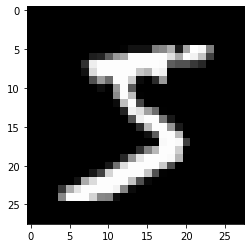

<function matplotlib.pyplot.show>

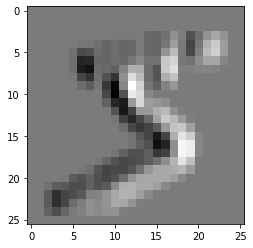

In [ ]:
dataset = np.load('MNIST.npz')
images = dataset['X_train']
print(images.shape)
kernel = np.array([[1 ,0, -1], [1, 0, -1], [1, 0, -1]])
images_conv = convolve_grayscale_valid(images, kernel)
print(images_conv.shape)

plt.imshow(images[0], cmap='gray')
plt.show()
plt.imshow(images_conv[0], cmap='gray')
plt.show

## 1. Same Convolution 

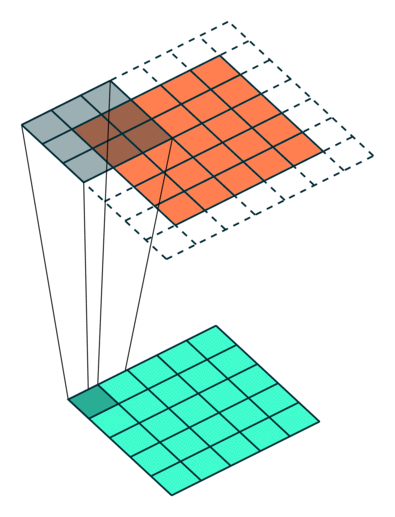

In [ ]:
def convolve_grayscale_same(images, kernel):
    m, h, w = images.shape
    kh, kw = kernel.shape


    ph = kh // 2
    pw = kw // 2 

    oh = h + 2 * ph - kh + int ( kh % 2 == 1) 
    ow = w + 2 * pw - kw + int (kw % 2 == 1 )

    output_dim=(m, oh, ow)

    outputs = np.zeros(output_dim)

    padded_images = np.pad(images, pad_width=((0,0),(ph, ph),(pw, pw)), mode='constant', constant_values=0)

    for i in range(oh):
        for j in range(ow): 
            M = padded_images[:, i:i + kh, j: j + kw]
            outputs[:, i, j] = np.sum(np.multiply(M,kernel), axis=(1,2))

    return outputs



Test

(50000, 28, 28)
(50000, 28, 28)


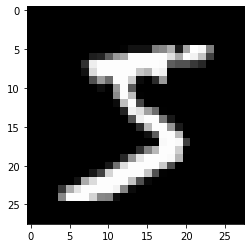

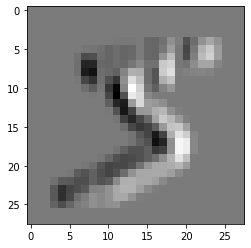

In [ ]:
dataset = np.load('MNIST.npz')
images = dataset['X_train']
print(images.shape)
kernel = np.array([[1 ,0, -1], [1, 0, -1], [1, 0, -1]])
images_conv = convolve_grayscale_same(images, kernel)
print(images_conv.shape)

plt.imshow(images[0], cmap='gray')
plt.show()
plt.imshow(images_conv[0], cmap='gray')
plt.show()

#2. Convolution with Padding

In [ ]:
def convolve_grayscale_padding(images, kernel, padding):

    m, h, w = images.shape
    kh, kw = kernel.shape


    ph, pw = padding[0], padding[1]

    oh = h + 2 * ph - kh + 1
    ow = w +2 * pw - kw +1


    output_dim=(m, oh, ow)

    outputs = np.zeros(output_dim)

    padded_images = np.pad(images, pad_width=((0,0),(ph, ph),(pw, pw)), mode='constant', constant_values=0)

    for i in range(oh):
        for j in range(ow): 
            M = padded_images[:, i:i + kh, j: j + kw]
            outputs[:, i, j] = np.sum(np.multiply(M,kernel), axis=(1,2))

    return outputs



Test

(50000, 28, 28)
(50000, 30, 34)


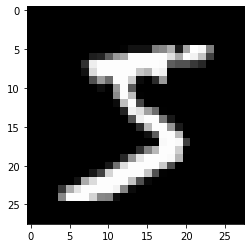

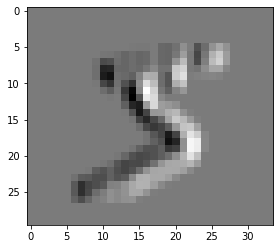

In [ ]:
dataset = np.load('MNIST.npz')
images = dataset['X_train']
print(images.shape)
kernel = np.array([[1 ,0, -1], [1, 0, -1], [1, 0, -1]])
images_conv = convolve_grayscale_padding(images, kernel, (2, 4))
print(images_conv.shape)

plt.imshow(images[0], cmap='gray')
plt.show()
plt.imshow(images_conv[0], cmap='gray')
plt.show()

# 3. Strided Convolution

In [ ]:

def convolve_grayscale(images, kernel, padding='same', stride=(1, 1)):

    m, h, w = images.shape
    kh, kw = kernel.shape
    sh, sw = stride[0], stride[1]
    ph, pw = padding[0], padding[1]

    if padding == 'valid':
        ph = pw = 0

    elif padding == "same":
        ph = int(((h - 1) * sh + kh - h ) / 2 + (kh % 2 == 0))
        pw = int(((w - 1) * sw + kw - w ) / 2 + (kw % 2 == 0))
    else:
        ph, pw = padding[0], padding[1]


    oh =int (((h + 2 * ph - kh) / sh) + 1)
    ow =int (((w + 2 * pw - kw) / sw) + 1)


    output_dim=(m, oh, ow)

    outputs = np.zeros(output_dim)

    padded_images = np.pad(images, pad_width=((0,0),(ph, ph),(pw, pw)), mode='constant', constant_values=0)

    for i in range(oh):
        for j in range(ow): 
            x = (i * sh) + kh 
            y = (j * sw) + kw 
            M = padded_images[:, i * sh:x , j * sw : y]
            outputs[:, i, j] = np.sum(np.multiply(M,kernel), axis=(1,2))

    return outputs




Test

(50000, 28, 28)
(50000, 13, 13)


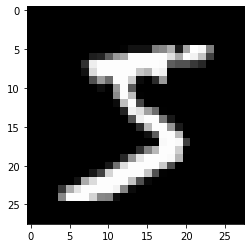

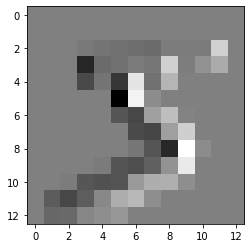

In [ ]:
dataset = np.load('MNIST.npz')
images = dataset['X_train']
print(images.shape)
kernel = np.array([[1 ,0, -1], [1, 0, -1], [1, 0, -1]])
images_conv = convolve_grayscale(images, kernel, padding='valid', stride=(2, 2))
print(images_conv.shape)

plt.imshow(images[0], cmap='gray')
plt.show()
plt.imshow(images_conv[0], cmap='gray')
plt.show()
